In [1]:
import numpy as np

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Permute, Reshape
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(512,512), classes=['Mountain_Bike', 'Road_Bike'], batch_size=15)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(512,512), classes=['Mountain_Bike', 'Road_Bike'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(512,512), classes=['Mountain_Bike', 'Road_Bike'], batch_size=5)

Found 90 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
weight_decay = 0.001
input_shape=(512,512,3)
batchSize=16
num_classes=2
epochs=10

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, input_shape=(512, 512,..., activation="relu", kernel_regularizer=<keras.reg..., padding="same", kernel_size=(3, 3))`
  if __name__ == '__main__':
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, activation="relu", kernel_regularizer=<keras.reg..., padding="same", kernel_size=(3, 3))`
  del sys.path[0]
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, activation="relu", kernel_regularizer=<keras.reg..., padding="same", kernel_size=(3, 3))`
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, activa

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 256)     295168    
__________

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
bikeData=model.fit_generator(train_batches,epochs=epochs,verbose=1,validation_data=valid_batches)

Epoch 1/10
6/6 [==============================] - 989s 165s/step - loss: 4.0788 - acc: 0.5111 - val_loss: 2.5872 - val_acc: 0.6875
Epoch 2/10
6/6 [==============================] - 974s 162s/step - loss: 2.4885 - acc: 0.7444 - val_loss: 2.4713 - val_acc: 0.5625
Epoch 3/10
6/6 [==============================] - 971s 162s/step - loss: 2.2258 - acc: 0.9111 - val_loss: 2.1921 - val_acc: 1.0000
Epoch 4/10
6/6 [==============================] - 976s 163s/step - loss: 2.1021 - acc: 0.9778 - val_loss: 2.0208 - val_acc: 1.0000
Epoch 5/10
6/6 [==============================] - 968s 161s/step - loss: 1.9655 - acc: 1.0000 - val_loss: 1.9597 - val_acc: 1.0000
Epoch 6/10
6/6 [==============================] - 973s 162s/step - loss: 1.9165 - acc: 1.0000 - val_loss: 1.9134 - val_acc: 1.0000
Epoch 7/10
6/6 [==============================] - 972s 162s/step - loss: 1.8796 - acc: 1.0000 - val_loss: 1.8802 - val_acc: 1.0000
Epoch 8/10
6/6 [==============================] - 974s 162s/step - loss: 1.8575 - a

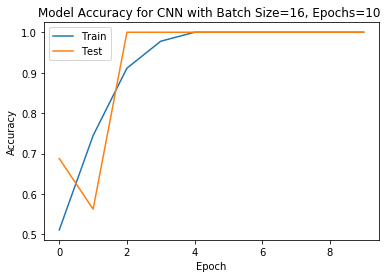

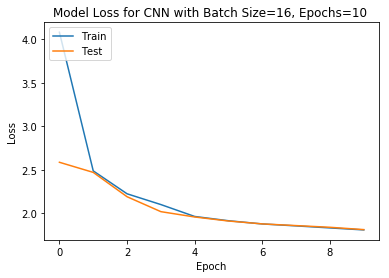

In [8]:
plt.plot(bikeData.history['acc'])
plt.plot(bikeData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(bikeData.history['loss'])
plt.plot(bikeData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()